# Enunciado

Vamos obter informações sobre o rendimento de alunos de um curso em algumas disciplinas ao longo dos anos.

O primeiro arquivo contido no Dataset Notas, historico-alg1_SIGA_ANONIMIZADO.csv, refere-se ao aproveitamento de estudantes na disciplina ALGORITMOS 1 entre os anos de 2011 e 2022.

A primeira coluna ("matricula") é composta por números inteiros, onde cada número representa um indivíduo. Assim, repetições nessa coluna indicam que o estudante fez mais de uma vez a mesma matéria.

Atenção: R-nota indica REPROVAÇÃO POR NOTA e R-freq REPROVAÇÃO POR FALTA. Se houver outro "status" para representar reprovação, este dever ser trocado para o rótulo adequado (R-nota ou R-freq). Frequências < 75 causam reprovação por falta; Médias abaixo de 50 causam reprovação por nota.

Analise o dataset do referido arquivo para responder as seguintes perguntas:

1. Qual é a média de nota dos aprovados (no período total e por ano)?

2. Qual é a média de nota dos reprovados por nota (período total e ano)?

3. Qual é a frequência dos reprovados por nota (período total e por ano)?

4. Qual a porcentagem de evasões (total e anual)?

5. Como os anos de pandemia impactaram no rendimento dos estudantes em relação aos anos anteriores, considerando o rendimento dos aprovados, a taxa de cancelamento e as reprovações? Considere como anos de pandemia os anos de 2020 e 2021.

6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.

7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.

# Link para Relatório do Trabalho:

https://docs.google.com/document/d/1YauBHeoJ3GRilH5dtzsgSH8rIce0Q8iPXxvYRLX7jrM/edit

# Sumário

1. Importações
2. Carregamento de Dados
3. Análise Descritiva de Dados
4. Análise Exploratória de Dados
5. **Respostas do Trabalho**

# Importações

In [1]:
## utilizando python 3.11.9
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

# Carregando Dados

In [2]:
df = pd.read_csv('historico-alg1_SIGA_ANONIMIZADO.csv')

# Análise Descritiva dos Dados

## Dimensão do Dataset

In [9]:
print(f'Número de linhas {df.shape[0]}')
print(f'Número de colunas {df.shape[1]}')

Número de linhas 909
Número de colunas 16


## Tratamento Valores Nulos

In [10]:
df.isna().sum()/df.shape[0]

matricula             0.000000
codigo                0.000000
disciplina            0.000000
periodo               0.000000
ano                   0.000000
curriculo             0.000000
ch                    0.000000
nota                  0.000000
frequencia            0.000000
status                0.000000
tipo                  0.000000
observacao            0.970297
natureza              0.000000
situacaoDiscente      0.000000
nomeTuma              0.265127
codigoCurriculoSie    0.000000
dtype: float64

In [11]:
df.sample(10)

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
823,527,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2020,Sim,60,0,0,Aprovado,EQUIVALENCIA,NaN,Obrigatória,Registro ativo,NaN,21A
425,270,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2020,Sim,60,0,0,R-freq,TURMA,NaN,Obrigatória,Evasão,ERE 2 - C,21A
285,175,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2022,Sim,60,0,0,Matriculado,TURMA,NaN,Obrigatória,Registro ativo,BCC1,21A
298,185,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,16,93,R-nota,TURMA,NaN,Obrigatória,Registro ativo,D,21A
633,407,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2014,Sim,60,70,93,Aprovado,TURMA,NaN,Obrigatória,Conclusão formatura,C,21A
830,529,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2021,Sim,60,8,100,R-nota,TURMA,NaN,Obrigatória,Registro ativo,D,21A
0,0,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2016,Sim,60,67,96,Aprovado,TURMA,C,Obrigatória,Conclusão formatura,NaN,21A
874,552,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,2,2018,Não,60,86,93,Aprovado,TURMA,NaN,-,Registro ativo,B,21A
221,131,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2022,Sim,60,0,0,Matriculado,TURMA,NaN,Obrigatória,Registro ativo,BCC1,21A
581,373,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2022,Sim,60,99,100,Aprovado,TURMA,NaN,Obrigatória,Registro ativo,BCC2,21A


Os valores nulos nas colunas 'observacao' e 'nomeTuma' não parecer ser problemas para as análises propostas aqui, por isso as colunas serão simplesmente removidas

In [12]:
df = df.drop(columns=['observacao','nomeTuma'], axis =1)

## Tratamento Tipo dos Dados

In [13]:
df.sample()

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,natureza,situacaoDiscente,codigoCurriculoSie
653,421,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2021,Sim,60,96,100,Aprovado,TURMA,Obrigatória,Registro ativo,21A


In [14]:
df.dtypes

matricula              int64
codigo                object
disciplina            object
periodo               object
ano                    int64
curriculo             object
ch                     int64
nota                   int64
frequencia             int64
status                object
tipo                  object
natureza              object
situacaoDiscente      object
codigoCurriculoSie    object
dtype: object

In [15]:
df.loc[df['periodo'] == 'Anual', 'periodo'] = '2'
df['periodo'] = df['periodo'].astype('int64')

Todas as colunas parecerm estar com o tipo de dado adequado, apena a coluna periodo que possui números mas possui uma categoria 'Anual' e portante será mantida como string

## Distribuição dos Dados

In [16]:
num_atributes = df.select_dtypes(include=['int64','float64'])
cat_atributes = df.select_dtypes(exclude=['int64','float64'])

### Variáveis Númericos

In [17]:
num_atributes.describe()

,matricula,periodo,ano,ch,nota,frequencia
count,909.000000,909.000000,909.000000,909.0,909.000000,909.000000
mean,287.009901,1.193619,2019.002200,60.0,45.251925,70.081408
std,171.329142,0.395352,2.160416,0.0,36.945658,42.035699
min,0.000000,1.000000,2011.000000,60.0,0.000000,0.000000
25%,134.000000,1.000000,2018.000000,60.0,0.000000,0.000000
50%,288.000000,1.000000,2019.000000,60.0,53.000000,93.000000
75%,437.000000,1.000000,2021.000000,60.0,79.000000,100.000000
max,572.000000,2.000000,2022.000000,60.0,100.000000,100.000000


### Variáveis Categoricas

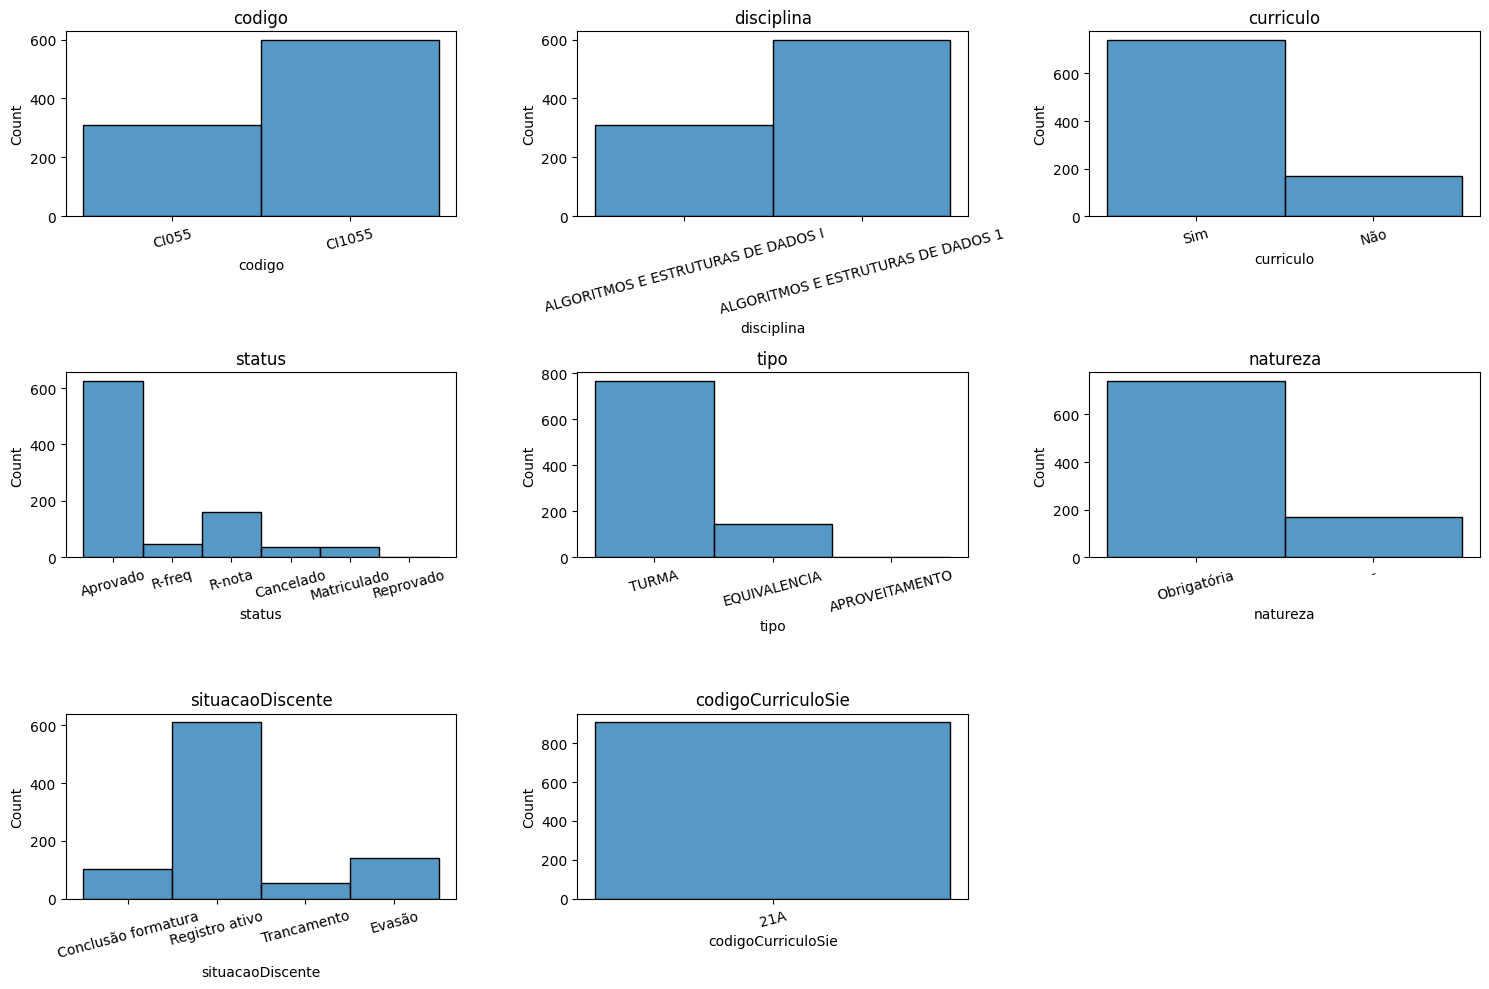

In [18]:
features = cat_atributes.columns.tolist()
ncols = 3 if int(np.ceil(np.sqrt(len(features)))) > 3 else int(np.ceil(np.sqrt(len(features))))
nrows = int(np.ceil(len(features)/ncols))

plt.figure(figsize=(15,10))
for col in cat_atributes.columns.tolist():
    plt.subplot(nrows,ncols,features.index(col)+1)
    plt.title(col)
    sns.histplot(cat_atributes[col])
    plt.xticks(rotation=15)

plt.tight_layout()

Notamos que o na coluna status há um valor identificado como 'Reprovado' sem especificar se a reprovação foi pro frequencia ou nota. Assim, esse valor será corrigido considerando primeiro a reprovação por frequencia, tendo a premissa que ela sempre ocorrerá primeiro que a reprovação por nota

### Corrigindo valores

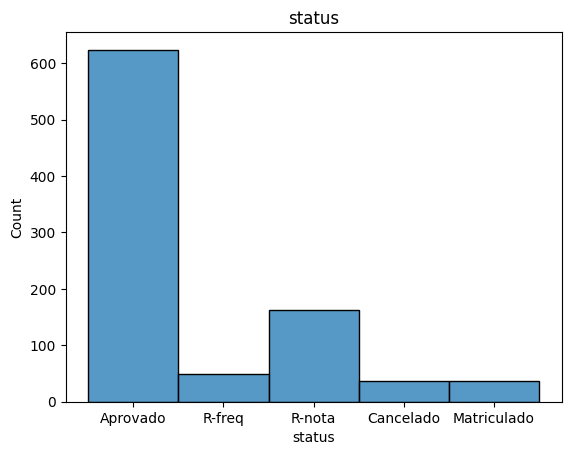

In [19]:
df.loc[df['status'] == 'Reprovado','status'] = df.loc[df['status'] == 'Reprovado'].apply(lambda x: 'R-freq' if x['frequencia'] < 75 else 'R-nota' if x['nota'] < 50 else x['status'], axis = 1)
plt.title('status')
sns.histplot(df['status']);

# Análise Exploratória

In [20]:
df.head()

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,natureza,situacaoDiscente,codigoCurriculoSie
0,0,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2016,Sim,60,67,96,Aprovado,TURMA,Obrigatória,Conclusão formatura,21A
1,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,73,R-freq,TURMA,Obrigatória,Registro ativo,21A
2,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2019,Sim,60,11,76,R-nota,TURMA,Obrigatória,Registro ativo,21A
3,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2020,Sim,60,0,0,Cancelado,TURMA,Obrigatória,Registro ativo,21A
4,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2020,Sim,60,0,0,Cancelado,TURMA,Obrigatória,Registro ativo,21A


## Análise Univariada

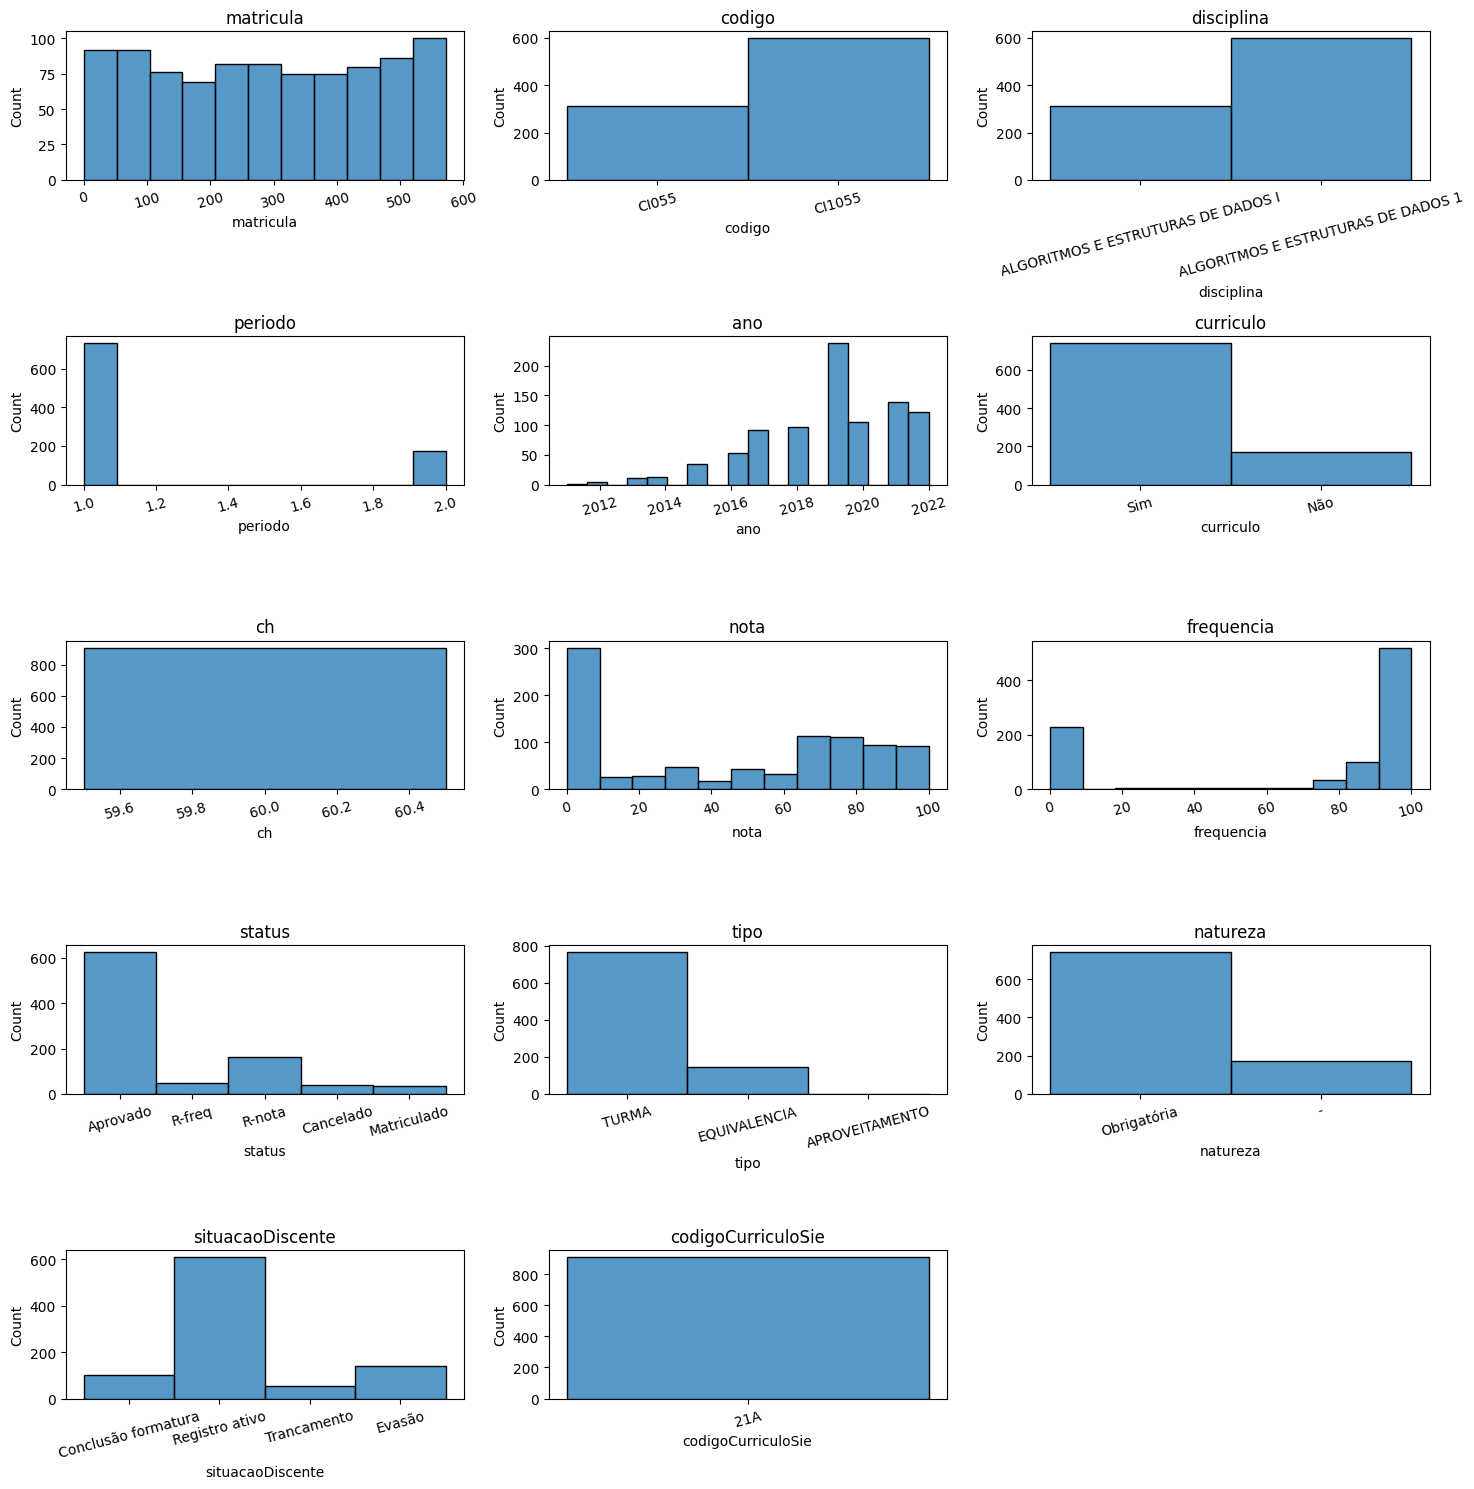

In [21]:
features = df.columns.tolist()
ncols = 3 if int(np.ceil(np.sqrt(len(features)))) > 3 else int(np.ceil(np.sqrt(len(features)))) > 3
nrows = int(np.ceil(len(features)/ncols))

plt.figure(figsize=(15,15))
for col in features:
    try:
        plt.subplot(nrows,ncols,features.index(col)+1)
    except:
        break
    plt.title(col)
    sns.histplot(df[col])
    plt.xticks(rotation=15)

plt.tight_layout()

# Respostas do Trabalho

### 1. Qual é a média de nota dos aprovados (no período total e por ano)?

- Para esse cálculo, foram considerados todos os alunos que cursaram a disciplina em cada um dos anos.
    - As equivalências foram removidas pois não representam situações de aprovação reais em determinado período/ano.

- Para o cálculo da média dos aprovados por período, foram consideradas todas as aprovações, exceto as equivalências, de determinado período sob o total de alunos de determinado período.

- Assim, a média geral de todos os anos foi de 73.6 e a média por período pode ser vista em mais detalhes no gráfico.


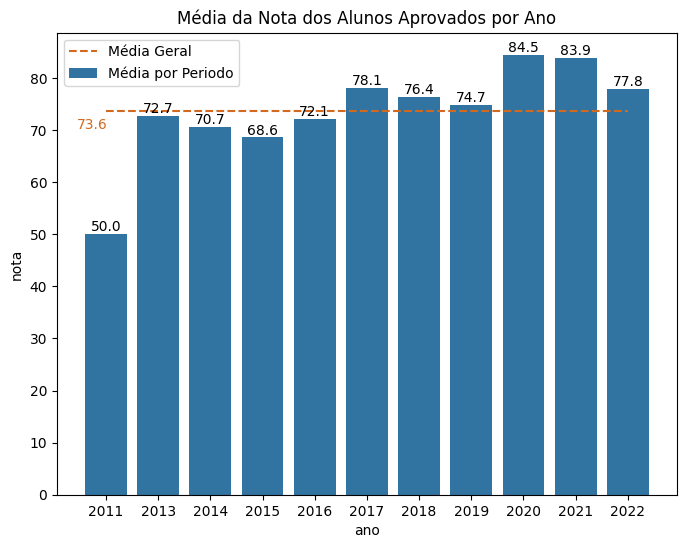

In [22]:
df_aux = df.loc[(df['status'] == 'Aprovado') & (df['tipo'] != 'EQUIVALENCIA'), ['ano', 'nota']].groupby('ano').mean().reset_index()
df_aux['mean'] = df_aux['nota'].mean()

plt.figure(figsize = (8,6))
plt.title('Média da Nota dos Alunos Aprovados por Ano')

g = sns.barplot(x='ano', y='nota', data = df_aux, label = 'Média por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.1f')

sns.lineplot(df_aux['mean'], linestyle='--', color = 'chocolate', label = 'Média Geral')
plt.figtext(0.15,0.72,round(df_aux['nota'].mean(),1), color='chocolate')

plt.legend()

### 2. Qual é a média de nota dos reprovados por nota (período total e ano)?

- O cálculo da média de nota dos reprovados tomou como base a nota de cada aluno que cursou a disciplina em cada um dos anos, a fim de considerar todas as notas dos alunos de cada turma integralmente. Assim, caso um aluno tenha reprovado por nota mais de uma vez na matéria, sua nota estará presente na média de dois períodos diferentes

- Sendo assim, a média de nota foi calculada selecionando somente os alunos reprovados por notas no período dos dados.

- Dessa forma, a média dos reprovados por nota foi de 22.9 e a média da nota por ano pode ser verificada em mais detalhes no gráfico abaixo:


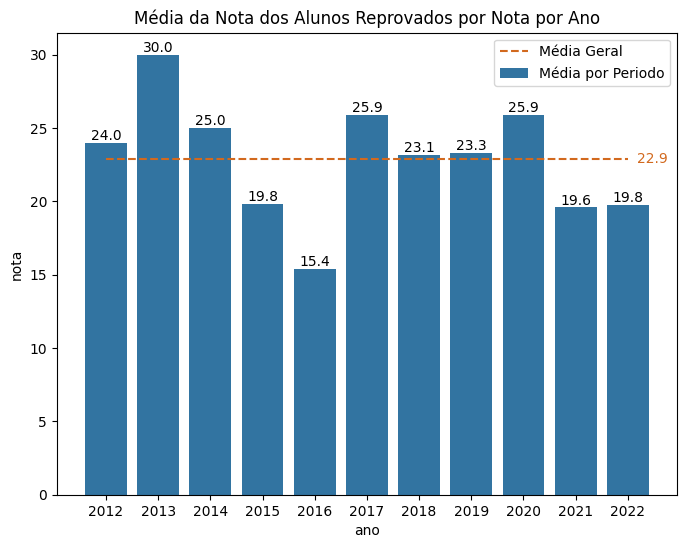

In [23]:
df_aux = df.loc[df['status'] == 'R-nota', ['ano', 'nota']].groupby('ano').mean().reset_index()
df_aux['media_reprovados'] = df_aux['nota'].mean()

plt.figure(figsize = (8,6))
plt.title('Média da Nota dos Alunos Reprovados por Nota por Ano')

g = sns.barplot(x='ano', y='nota', data = df_aux, label = 'Média por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.1f')

sns.lineplot(df_aux['media_reprovados'], linestyle='--', color = 'chocolate', label = 'Média Geral')
plt.figtext(0.85,df_aux['media_reprovados'].max()/df_aux['nota'].max()-0.1 ,round(df_aux['media_reprovados'].mean(),1), color='chocolate')

plt.legend();

### 3. Qual é a frequência dos reprovados por nota (período total e por ano)?

- O cálculo da frequência dos reprovados por nota tomou como base cada aluno que cursou a disciplina em cada um dos anos. Dessa forma, caso um aluno tenha sido reprovado por nota mais de uma vez, ele estará presente no cálculo em todos os respectivos anos em que cursou a disciplina.

- Entende-se aqui por frequência dos reprovados por nota, a contagem (total) de alunos reprovados por nota no período todo e por ano.

- Assim sendo, a média geral dessa frequência foi calculada considerando todas as reprovações por nota presentes no conjunto de dados e a média anual da frequência, considerando apenas as reprovações por nota daquele ano.

- Dessa forma, a média geral da frequência dos reprovados por nota foi de 14.7 e a média de cada um dos anos por ser vista em detalhes no gráfico abaixo.


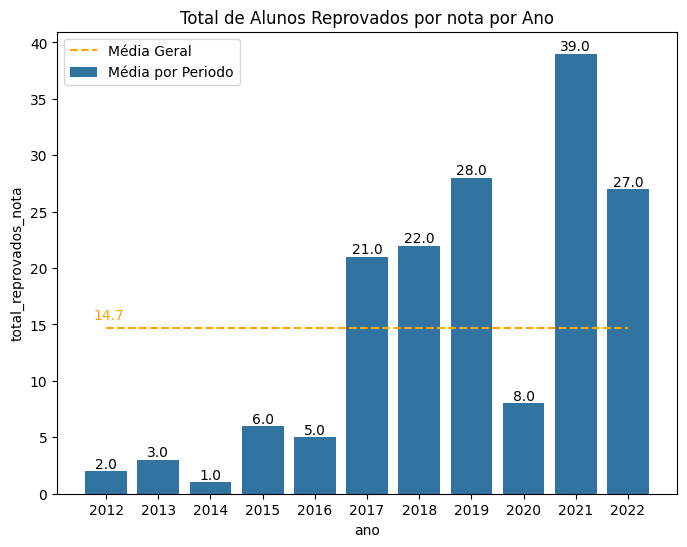

In [24]:
df_aux = df.loc[df['status'] == 'R-nota', ['ano', 'matricula']].groupby('ano').count().reset_index().rename(columns={'matricula':'total_reprovados_nota'})
df_aux['frequencia_reprovados'] = df_aux['total_reprovados_nota'].mean()

plt.figure(figsize = (8,6))
plt.title('Total de Alunos Reprovados por nota por Ano')

g = sns.barplot(x='ano', y='total_reprovados_nota', data = df_aux, label = 'Média por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.1f')

sns.lineplot(df_aux['frequencia_reprovados'], linestyle='--', color = 'orange', label = 'Média Geral')
plt.figtext(0.17,0.4 ,round(df_aux['frequencia_reprovados'].mean(),1), color='orange')

plt.legend();

### 4. Qual a porcentagem de evasões (total e anual)?

- O cálculo do percentual de evasão tomou como base todas as situações do discente que cursou a disciplina em cada um dos anos. Assim, é uma premissa dessa análise que, após o período da sua evasão, o aluno não curse novamente a disciplina e portanto não entre nos cálculos novamente.

- Neste cálculo, os registros marcados como 'EQUIVALENCIA' foram desconsiderados uma vez que duplicam o aluno dentro da base.

- Com isso, o percentual foi calculado dividindo-se a quantidade de evasões observadas no ano em questão pelo total de alunos registrados naquele ano. O percentual geral foi calculado da mesma forma porém considerando todo o conjunto de dados

- Dessa forma, temos que a evasão média geral de todo o período foi de 15% e a evasão de cada um dos anos pode ser verificada em mais detalhes no gráficos abaixo


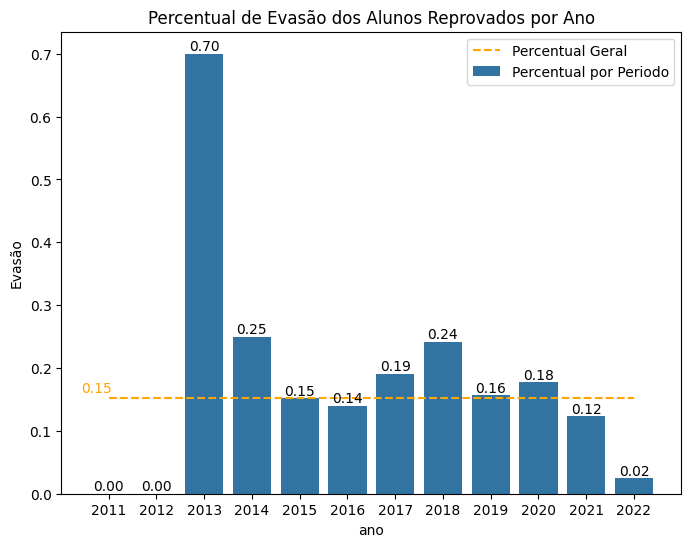

In [25]:
df1 = df.loc[df['tipo'] != 'EQUIVALENCIA'].copy()
df_aux = pd.crosstab(df1['ano'], df1['situacaoDiscente'], normalize='index')['Evasão'].reset_index()
df_aux['media_periodo'] = df1.loc[df['situacaoDiscente'] == 'Evasão'].shape[0]/df1.shape[0]

plt.figure(figsize = (8,6))
plt.title('Percentual de Evasão dos Alunos Reprovados por Ano')

g = sns.barplot(x='ano', y='Evasão', data = df_aux, label = 'Percentual por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.2f')

sns.lineplot(df_aux['media_periodo'], linestyle='--', color = 'orange', label = 'Percentual Geral')
plt.figtext(0.15,df_aux['media_periodo'].max()/df_aux['Evasão'].max() + 0.06,round(df_aux['media_periodo'].mean(),2), color='orange')

plt.legend();

### 5. Como os anos de pandemia impactaram no rendimento dos estudantes em relação aos anos anteriores, considerando o rendimento dos aprovados, a taxa de cancelamento e as reprovações? Considere como anos de pandemia os anos de 2020 e 2021.

- Considerando os anos de pandemia como sendo os anos de 2020 e 2021, é possível notar uma mudança no rendimento dos estudantes no que diz respeito à aprovações, reprovações e cancelamentos.

- É evidente que os anos da pandemia, 2020 e 2021, foram os anos com maior nota média dos aprovados dentre todos os anos da disciplina, Os anos destacados em vermelho na figura 1 mostrando que a média de nota dos alunos aprovados foi a maior dentre todos os anos da disciplina

- Além disso, na figura 2, notamos um aumento dos cancelamentos do ano de 2019 para 2020 que foi de 21% e em 2021 o aumento das reprovações totais de 12% para 40% e ainda que uma pequena parcela dos alunos (4% em 2020 e 1% em 2021) continuam matriculados, indicando talvez que tenham trancado o curso.


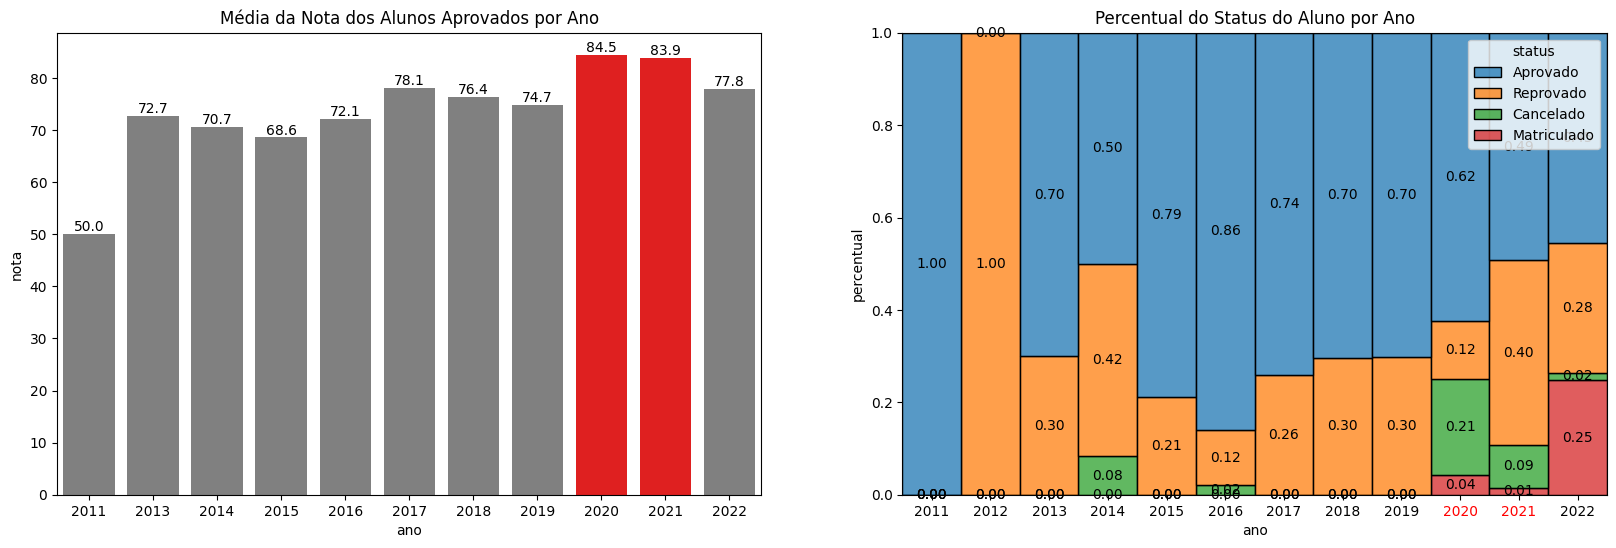

In [26]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

df_aux = df.loc[(df['status'] == 'Aprovado') & (df['tipo'] != 'EQUIVALENCIA'), ['ano', 'nota']].groupby('ano').mean().reset_index()
df_aux['mean'] = df_aux['nota'].mean()
df_aux['ano'] = df_aux['ano'].astype('str')

plt.title('Média da Nota dos Alunos Aprovados por Ano')
clrs = ['gray' if (x not in ['2020','2021']) else 'red' for x in df_aux['ano'].values ]

g = sns.barplot(x = 'ano', hue='ano', y='nota', data = df_aux, label = 'Média por Periodo', legend = False, palette = clrs)
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.1f');

plt.subplot(1,2,2)
plt.title('Percentual do Status do Aluno por Ano')

df_aux = df.loc[df['tipo'] != 'EQUIVALENCIA'].copy()
df_aux['ano'] = df_aux['ano'].astype('str')
df_aux['status'] = df_aux['status'].replace({'R-freq':'Reprovado','R-nota':'Reprovado'})

g = sns.histplot(x = 'ano', hue = 'status', multiple = 'fill', data = df_aux.sort_values('ano'), bins=len(df_aux['ano'].unique())-1)
plt.ylabel('percentual')
for i in g.containers:
    g.bar_label(i, label_type = 'center', fmt = '%.2f', color='black')

for label in g.get_xticklabels():
    if label.get_text() in ['2020','2021']:
        label.set_color('red')


### 6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.

- Desconsiderando as equivalências, a partir do ano de 2020/1, começamos a notar o aumento no percentual de cancelamentos e de reprovações que se estendeu até 2021/2 como é possível observar no gráfico (figura 1)

- Com a volta às aulas de maneira híbrida em 2022/1, é possível notar o começo de uma diminuição das reprovações (de 50% para 36%) que era crescente desde o início das aulas EAD (figura 2). Além disso, em 2022/1 a média dos aprovados voltou a um patamar mais próximo da pré pandemia, por volta dos 77% de aproveitamento (figura 2). 


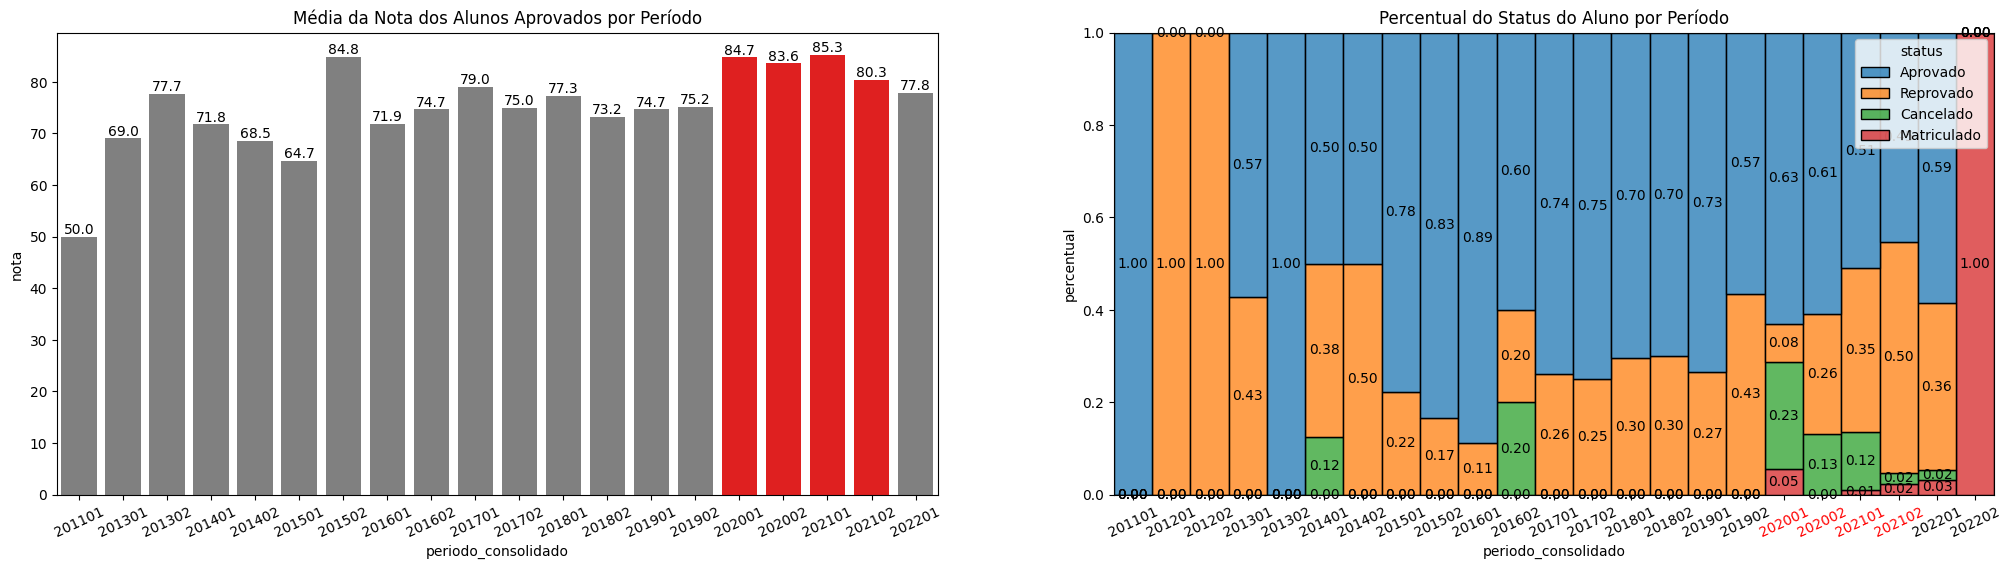

In [27]:
df_aux = df.loc[df['tipo'] != 'EQUIVALENCIA'].copy()
df_aux['status'] = df_aux['status'].replace({'R-freq':'Reprovado','R-nota':'Reprovado'})
df_aux['periodo_consolidado'] = df_aux['ano']*100 +  df_aux['periodo']
df_aux['periodo_consolidado'] = df_aux['periodo_consolidado'].astype(str)
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
df_aux1 = df_aux.loc[(df_aux['status'] == 'Aprovado') & (df_aux['tipo'] != 'EQUIVALENCIA'), ['periodo_consolidado', 'nota']].groupby('periodo_consolidado').mean().reset_index()
df_aux1['mean'] = df_aux1['nota'].mean()
df_aux1['periodo_consolidado'] = df_aux1['periodo_consolidado'].astype('str')

plt.title('Média da Nota dos Alunos Aprovados por Período')
clrs = ['gray' if (x not in ['202001','202002','202101','202102']) else 'red' for x in df_aux1['periodo_consolidado'].values ]

g = sns.barplot(x = 'periodo_consolidado', hue='periodo_consolidado', y='nota', data = df_aux1, label = 'Média por Periodo', legend = False, palette=clrs)
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.1f');
plt.xticks(rotation = 25);

plt.subplot(1,2,2)
plt.title('Percentual do Status do Aluno por Período')
g = sns.histplot(x = 'periodo_consolidado', hue = 'status', multiple = 'fill', data = df_aux.sort_values(by='periodo_consolidado'), bins=len(df_aux['periodo_consolidado'].unique())-1)
for i in g.containers:
    g.bar_label(i, label_type = 'center', fmt = '%.2f', color='black')
plt.ylabel('percentual')
for label in g.get_xticklabels():
    if label.get_text() in ['202001','202002','202101','202102']:
        label.set_color('red')

plt.xticks(rotation = 25);

### 7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.

- Pelos dados, podemos perceber que no período de 2022/02 só há alunos com status 'MATRICULADO' o que impossibilita a comparação deste período com os demais.

- Isso acontece provavelmente porque os dados foram coletados no decorrer deste período letivo, enquanto todos os estudantes estavam cursando a disciplina e ainda não havia definições entre aprovação, reprovação ou cancelamentos

- Após coletar os do fim do período de 2022/02, será possível fazer essa comparação!


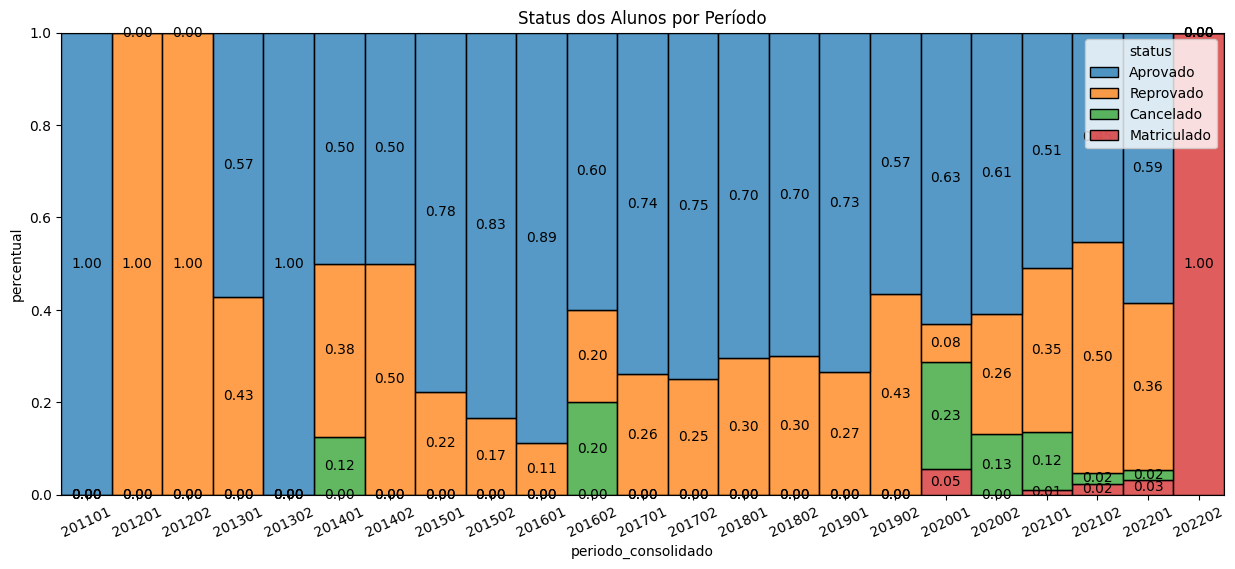

In [28]:
plt.figure(figsize = (15,6))

plt.title('Status dos Alunos por Período')
g = sns.histplot(x = 'periodo_consolidado', hue = 'status', multiple = 'fill', data = df_aux.sort_values(by='periodo_consolidado'), bins=len(df_aux['periodo_consolidado'].unique())-1)
for i in g.containers:
    g.bar_label(i, label_type = 'center', fmt = '%.2f', color='black')
plt.ylabel('percentual')

plt.xticks(rotation = 25);